# Matplotlib Advanced Customization

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


In [2]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


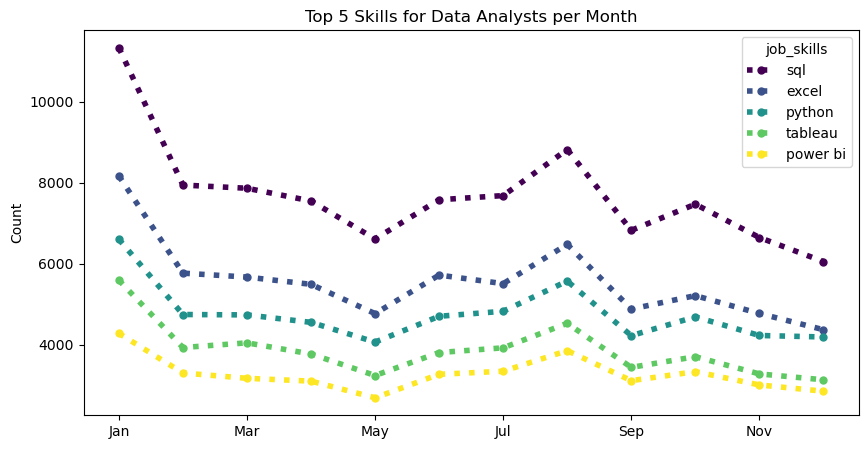

In [3]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Plotting
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: solid, dashed '-', dashdot '-.', dotted':', '--'
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10, 5),

)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Customizing our Scatter plot from <span style="color:gray">15_Scatter_Plot.ipynb</span>

In [4]:
df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(20)

C:\Users\rbrod\AppData\Local\Temp\ipykernel_31344\2473011219.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i])))


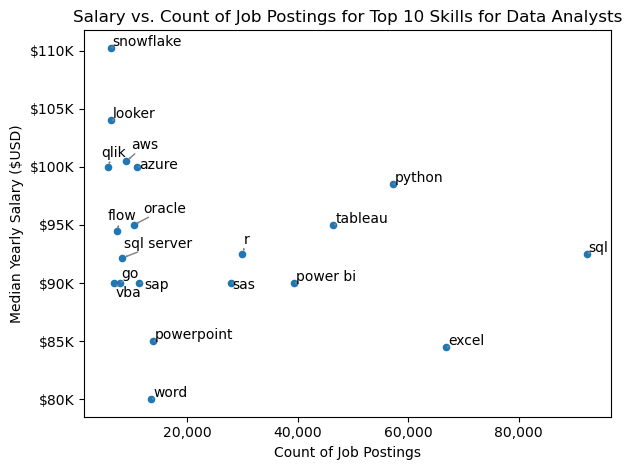

In [20]:
from adjustText import adjust_text



skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills for Data Analysts')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i])))

adjust_text(texts, min_arrow_len=0.5, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

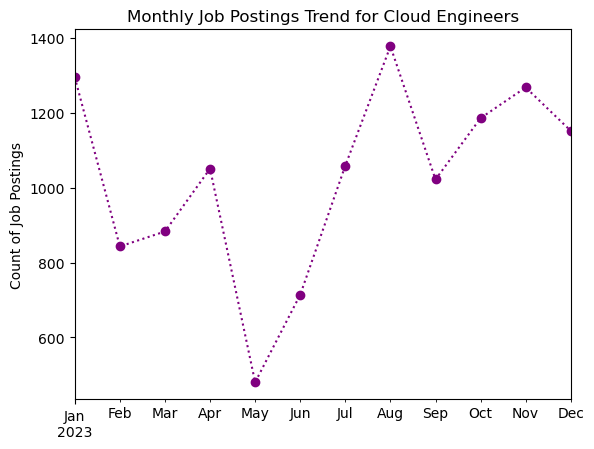

In [32]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()

df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

job_counts = df_ce.groupby('job_posted_month').size().reset_index(name='job_count')

job_counts.plot(kind='line', x='job_posted_month', y='job_count', marker='o', color='purple', linestyle=':')
plt.title('Monthly Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.legend().remove()

plt.show()

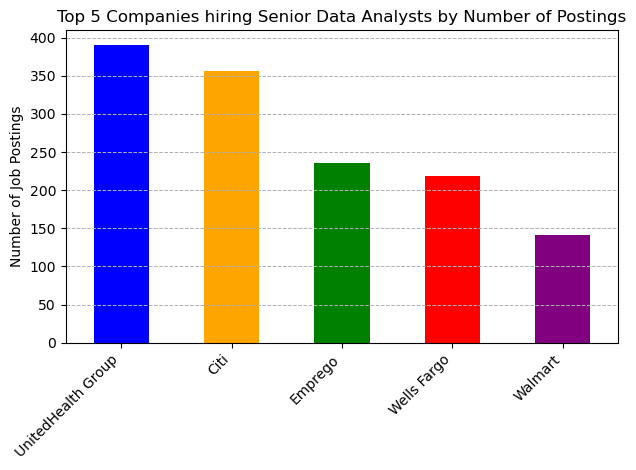

In [44]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

SDA_df

top_5_jobs = SDA_df['company_name'].value_counts().head(5)
colors = ['blue', 'orange', 'green', 'red', 'purple']

top_5_jobs.plot(kind='bar', color=colors)
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings')
plt.ylabel('Number of Job Postings')
plt.xlabel('')
plt.legend().remove()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()


plt.show()

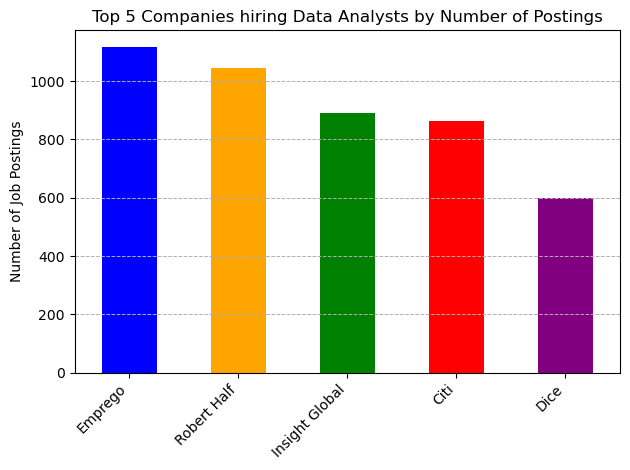

In [46]:
SDA2_df = df[df['job_title_short'] == 'Data Analyst'].copy()

top_5_jobs = SDA2_df['company_name'].value_counts().head(5)
colors = ['blue', 'orange', 'green', 'red', 'purple']

top_5_jobs.plot(kind='bar', color=colors)
plt.title('Top 5 Companies hiring Data Analysts by Number of Postings')
plt.ylabel('Number of Job Postings')
plt.xlabel('')
plt.legend().remove()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()


plt.show()